## To the Wait Line...and Beyond!
Exploring the wait time and feature data for Buzz Lightyear Space Ranger Spin at Walt Disney World and preparing it for Machine Learning models

In [71]:
#Import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [72]:
#Load in and Combine CSVs - Show resulting dataframe
df = pd.read_csv('MetaData_Reduced.csv')
df_waits = pd.read_csv('buzz_lightyear_wait_times.csv')

#Combine CSVs
df = df.merge(df_waits, on="date", how="left")

In [73]:
#Rename target column and drop columns that are not needed

# Make columns lowercase (preference)
df.columns = df.columns.str.lower()

#rename columns
df = df.rename(columns={'spostmin': 'wait_time'})

df = df.drop(columns =['sactmin'])
df = df.drop(columns =['season'])
df = df.drop(columns =['date'])
df = df.drop(columns =['mkopen'])
df = df.drop(columns =['mkclose'])
df = df.drop(columns =['dayofyear'])
df = df.drop(columns =['weather_wdwhigh'])
df = df.drop(columns =['weather_wdwlow'])


In [74]:
#Look at datatypes and describe target variable

# Drop rows with -999 Wait Times
value_to_drop = -999
df = df.drop(df[df['wait_time'] == value_to_drop].index)

# View wait time stats
print(df['wait_time'].describe())

df.dtypes

count    258697.000000
mean         32.341195
std          20.008752
min           0.000000
25%          15.000000
50%          30.000000
75%          45.000000
max         160.000000
Name: wait_time, dtype: float64


dayofweek                 int64
weekofyear                int64
monthofyear               int64
year                      int64
holidaypx                 int64
holidaym                  int64
holiday                   int64
wdwevent                  int64
wdwmaxtemp              float64
wdwmintemp              float64
wdwmeantemp             float64
insession                object
insession_enrollment     object
insession_wdw            object
mkhours                 float64
mkhoursyest             float64
mkhourstom              float64
weather_wdwprecip       float64
datetime                 object
wait_time               float64
dtype: object

### Visualizations

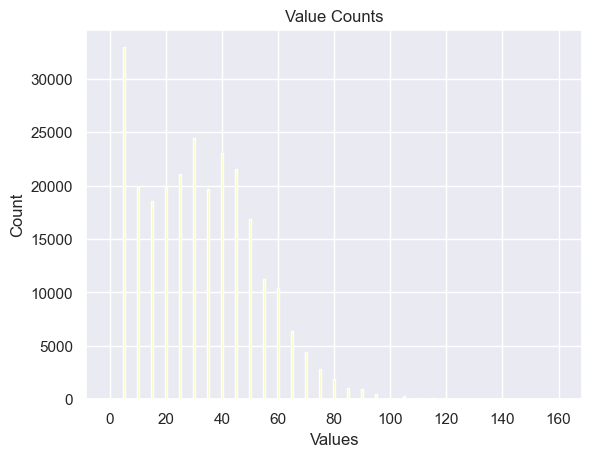

In [75]:
#Chart showing frequency of different wait times
series = pd.Series(df['wait_time'])
value_counts = series.value_counts()

# Extract unique values and their counts
values = value_counts.index
counts = value_counts.values

# Create a bar chart
plt.bar(values, counts)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Value Counts')

# Show the chart
plt.show()

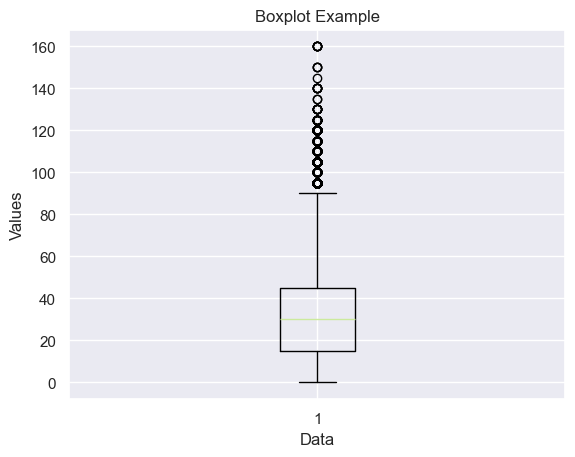

In [76]:
#Box and Whisker to look at wait time distribution

# Attempt to convert the column to numeric
try:
    pd.to_numeric(df['wait_time'])
    is_numeric = True
except (ValueError, TypeError):
    is_numeric = False


# Remove missing values (NaN)
data = df['wait_time']
data = [x for x in data if pd.notna(x)]


plt.boxplot(data)
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Boxplot Example')
plt.show()

In [77]:
#Checking to see how many values were above 90 minutes
y = 0
for x in data:
    if x > 90:
        y = y + 1

print(y)

1160


C:\Users\grant\AppData\Local\Temp\ipykernel_14444\1983279741.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = average_wait_time.pivot('year', 'monthofyear','wait_time')


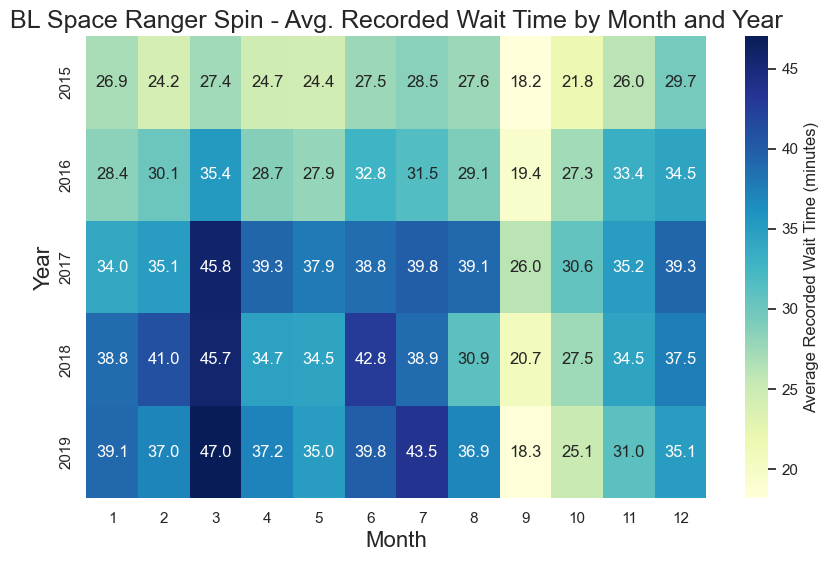

In [87]:
#Generate a heat map showing the average wait time by month and year

sns.set()

# Filter the DataFrame to exclude years 2020 and 2021
filtered_df = df[(df['year'] != 2020) & (df['year'] != 2021)] #Remove partial year and covid from visualization

average_wait_time = filtered_df.groupby(['year', 'monthofyear'])['wait_time'].mean().reset_index()
pivot_table = average_wait_time.pivot('year', 'monthofyear','wait_time')


# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table,cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Average Recorded Wait Time (minutes)'})
plt.title('BL Space Ranger Spin - Avg. Recorded Wait Time by Month and Year', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Year', fontsize=16)

plt.gca().set_facecolor('0.1')

plt.show()


C:\Users\grant\AppData\Local\Temp\ipykernel_14444\1338567342.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  september_data['weekofyear'] = september_data['weekofyear'].apply(map_week_to_september)
C:\Users\grant\AppData\Local\Temp\ipykernel_14444\1338567342.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = average_wait_time.pivot('weekofyear','year','wait_time')


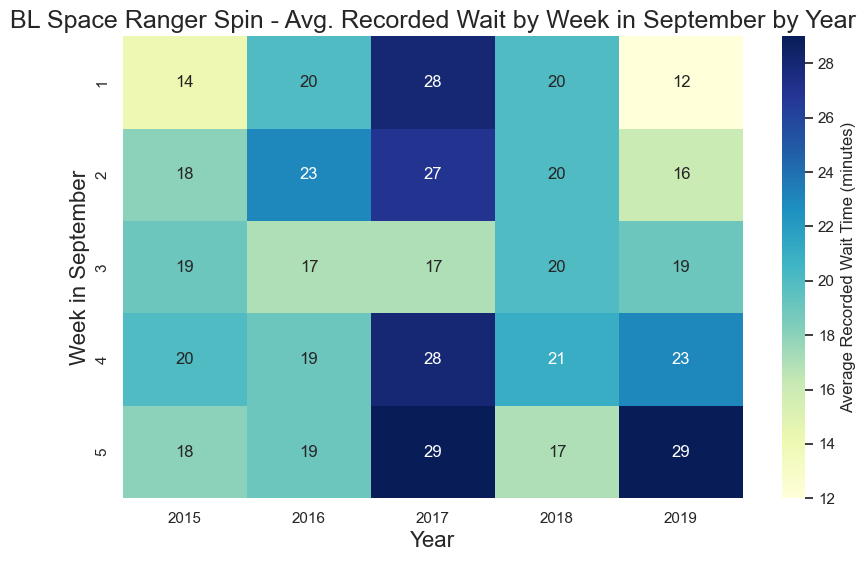

In [88]:
#Generate a heat map showing the average wait time by week in September and year

# Filter the DataFrame to exclude years 2020 and 2021
filtered_df = df[(df['year'] != 2020) & (df['year'] != 2021)] #Remove partial year and covid from visualization

september_data = filtered_df[(filtered_df['monthofyear']== 9) & (filtered_df['weekofyear'] != 34)]

# Function to map week numbers within September
def map_week_to_september(week):
    return week if week < 35 else week - 34

# Apply the mapping function to convert week of the year to week within September
september_data['weekofyear'] = september_data['weekofyear'].apply(map_week_to_september)

average_wait_time = september_data.groupby(['year','weekofyear'])['wait_time'].mean().reset_index()
# Round the average wait time to the nearest whole number
average_wait_time['wait_time'] = average_wait_time['wait_time'].round()
pivot_table = average_wait_time.pivot('weekofyear','year','wait_time')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, cbar_kws={'label': 'Average Recorded Wait Time (minutes)'})
plt.title('BL Space Ranger Spin - Avg. Recorded Wait by Week in September by Year', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Week in September', fontsize=16)
plt.show()

In [ ]:
#categorize the target variables
bins = [0,20,45,float('inf')]
labels = ['short', 'moderate', 'long']
df['wait_time'] = pd.cut(df['wait_time'], bins=bins, labels=labels)
df

,dayofweek,weekofyear,monthofyear,year,holidaypx,holidaym,holiday,wdwevent,wdwmaxtemp,wdwmintemp,wdwmeantemp,insession,insession_enrollment,insession_wdw,mkhours,mkhoursyest,mkhourstom,weather_wdwprecip,datetime,wait_time
0,5,0,1,2015,0,5,1,0,73.02,59.81,66.41,0%,0%,0%,17.0,18.0,17.0,0.12,1/1/2015 7:16,short
1,5,0,1,2015,0,5,1,0,73.02,59.81,66.41,0%,0%,0%,17.0,18.0,17.0,0.12,1/1/2015 7:23,short
2,5,0,1,2015,0,5,1,0,73.02,59.81,66.41,0%,0%,0%,17.0,18.0,17.0,0.12,1/1/2015 7:29,short
3,5,0,1,2015,0,5,1,0,73.02,59.81,66.41,0%,0%,0%,17.0,18.0,17.0,0.12,1/1/2015 7:37,short
4,5,0,1,2015,0,5,1,0,73.02,59.81,66.41,0%,0%,0%,17.0,18.0,17.0,0.12,1/1/2015 7:44,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275678,3,35,8,2021,7,0,0,0,85.87,75.88,80.88,NaN,NaN,NaN,12.0,12.0,12.0,0.28,8/31/2021 20:47,short
275679,3,35,8,2021,7,0,0,0,85.87,75.88,80.88,NaN,NaN,NaN,12.0,12.0,12.0,0.28,8/31/2021 20:54,short
275680,3,35,8,2021,7,0,0,0,85.87,75.88,80.88,NaN,NaN,NaN,12.0,12.0,12.0,0.28,8/31/2021 21:00,short
275683,3,35,8,2021,7,0,0,0,85.87,75.88,80.88,NaN,NaN,NaN,12.0,12.0,12.0,0.28,8/31/2021 21:18,short


In [ ]:
# See where the NAs and missing values are and correct for them

missing_values = df.isna().sum() #check to see what columns have missing values
#print(missing_values)

#As there aren't that many NAs, I will drop them all
df = df.dropna(axis='index', how='any') 

#Drop year as it is no longer needed
df = df.drop(columns=['year'])

df.dtypes

dayofweek                  int64
weekofyear                 int64
monthofyear                int64
holidaypx                  int64
holidaym                   int64
holiday                    int64
wdwevent                   int64
wdwmaxtemp               float64
wdwmintemp               float64
wdwmeantemp              float64
insession                 object
insession_enrollment      object
insession_wdw             object
mkhours                  float64
mkhoursyest              float64
mkhourstom               float64
weather_wdwprecip        float64
datetime                  object
wait_time               category
dtype: object

### Bin Variables

In [ ]:
#Bin enrollment variables

enrollment_to_bin = ['insession','insession_enrollment','insession_wdw']
enrollment_bin_edges = [-1,20,50,85,100]
enrollment_bin_labels = ['Very Low', 'Low', 'Moderate', 'High']

for col in enrollment_to_bin:
    df[col] = df[col].str.rstrip('%').astype(float)

for col in enrollment_to_bin:
    df[col] = pd.cut(df[col], bins=enrollment_bin_edges, labels=enrollment_bin_labels).astype(str)

In [ ]:
#Bin temperature Variables
temp_to_bin = ['wdwmaxtemp', 'wdwmintemp', 'wdwmeantemp']
temp_bin_edges = [-1,50,70,90,130]
temp_bin_labels = ['Cold', 'Moderate', 'Hot', 'Very_Hot']


for col in temp_to_bin:
    df[col] = pd.cut(df[col], bins=temp_bin_edges, labels=temp_bin_labels).astype(str)

In [ ]:
#Handle the times to drop year, month -- Round down to a whole number

df['datetime'] = pd.to_datetime(df['datetime'])
#Drop the date from datetime
df['datetime'] = df['datetime'].apply(lambda x: x.time())

#Make time a float with the hour being the whole number
df['datetime'] = df['datetime'].apply(lambda x: x.hour + x.minute / 60 + x.second / 3600)

# Round down the time values to the nearest whole number (integer)
df['datetime'] = df['datetime'].apply(lambda x: int(np.floor(x)))

In [ ]:
#Bin Hours
#print(df['mkhours'].describe())

hours_to_bin = ['mkhours', 'mkhoursyest', 'mkhourstom']
hours_bin_edges = [5,12,16,24]
hours_bin_labels = ['short_hours', 'normal_hours', 'long_hours']


for col in hours_to_bin:
    df[col] = pd.cut(df[col], bins=hours_bin_edges, labels=hours_bin_labels).astype(str)


In [ ]:
#Bin Precipitation
#print(df['weather_wdwprecip'].describe())


precip_bin_edges = [0.0,0.17,0.5]
precip_bin_labels = ['no_precip', 'some_precip']


df['weather_wdwprecip'] = pd.cut(df['weather_wdwprecip'], bins=precip_bin_edges, labels=precip_bin_labels).astype(str)


### Export dataframe as BL_PreparedV2Binned.csv

In [ ]:
#Export as a CSV
file_path = 'BL_PreparedV2Binned.csv'
df.to_csv(file_path, index=False)